## Preprocessing

[Electrical Grid Stability Simulated Data Data Set ](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+)

In [154]:
import numpy as ny
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
data=np.loadtxt("./data/PartI/Data_for_UCI_named.csv",delimiter=",",skiprows=1,dtype=str)
#"tau1","tau2","tau3","tau4","p1","p2","p3","p4","g1","g2","g3","g4","stab","stabf"
#0       1      2       3     4    5    6    7    8     9   10   11   12     13

data=data[:,[0,1,2,3,5,6,7,8,9,10,11,12]].copy()
#"tau1","tau2","tau3","tau4","p2","p3","p4","g1","g2","g3","g4","stab",
#   0     1     2      3      4    5    6    7    8    9    10   11

In [133]:
#随机化
np.random.shuffle(data)
X=data[:,:11].copy().astype("float")
y=data[:,11].astype("float")>0
X=(X-X.mean(axis=0))/X.std(axis=0)

np.save("./data/PartI/X.npy",X)
np.save("./data/PartI/y.npy",y)

## KNN

In [137]:
X=np.load("./data/PartI/X.npy")
y=np.load("./data/PartI/y.npy")

test_size=X.shape[0]//10
#分割train test 10%
X_test=X[:test_size]
y_test=y[:test_size]

X_train=X[test_size:]
y_train=y[test_size:]

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape)

(1000, 11) (1000,) (9000, 11) (9000,)


In [143]:
class KNN():
    def __init__(self, k=5):
        self.k = k

    def predict(self, X_test, X_train, y_train):
        y_pred=np.empty(X_test.shape[0],dtype=int)
        for i,X in enumerate(X_test):
            if i%100 ==0:
                print(i)
            y_pred[i]=np.bincount(y_train[np.argsort(np.linalg.norm(X-X_train,axis=1))[:self.k]]).argmax()
        return y_pred

In [147]:
model=KNN(3)
y_pred=model.predict(X_test[:],X_train[:],y_train)

0
100
200
300
400
500
600
700
800
900


In [148]:
result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
result

[(True, 802), (False, 198)]

In [152]:
result=[]
for i in range(1,52,2):
    model=KNN(i)
    y_pred=model.predict(X_test[:],X_train[:],y_train)
    temp_result=Counter(np.equal(y_pred[:],y_test[:])).most_common()
    print(i,"\t",temp_result)
    result.append(temp_result)

0
100
200
300
400
500
600
700
800
900
1 	 [(True, 831), (False, 169)]
0
100
200
300
400
500
600
700
800
900
3 	 [(True, 856), (False, 144)]
0
100
200
300
400
500
600
700
800
900
5 	 [(True, 854), (False, 146)]
0
100
200
300
400
500
600
700
800
900
7 	 [(True, 861), (False, 139)]
0
100
200
300
400
500
600
700
800
900
9 	 [(True, 870), (False, 130)]
0
100
200
300
400
500
600
700
800
900
11 	 [(True, 868), (False, 132)]
0
100
200
300
400
500
600
700
800
900
13 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
15 	 [(True, 878), (False, 122)]
0
100
200
300
400
500
600
700
800
900
17 	 [(True, 874), (False, 126)]
0
100
200
300
400
500
600
700
800
900
19 	 [(True, 880), (False, 120)]
0
100
200
300
400
500
600
700
800
900
21 	 [(True, 875), (False, 125)]
0
100
200
300
400
500
600
700
800
900
23 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
25 	 [(True, 876), (False, 124)]
0
100
200
300
400
500
600
700
800
900
27 	 [(True, 876), (False, 124)]
0
100
200
3

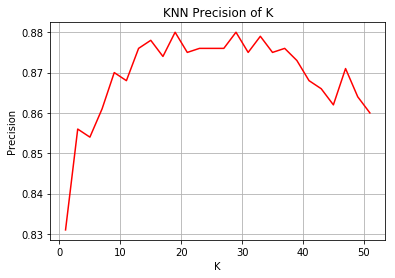

In [171]:
plt.figure(1)
plt.plot(range(1,52,2),[i[0][1]/1000 for i in result],'r')
#plt.plot(range(1,52,2),[i[1][1]for i in result],'g')
plt.title("KNN Precision of K")
plt.ylabel("Precision")
plt.xlabel("K")
plt.grid(True)
plt.savefig("./graph/PartI/KNN_Precision.png",dpi=1000)
plt.show()

## Logistic Regression

In [137]:
X=np.load("./data/PartI/X.npy")
y=np.load("./data/PartI/y.npy")

test_size=X.shape[0]//10
#分割train test 10%
X_test=X[:test_size]
y_test=y[:test_size]

X_train=X[test_size:]
y_train=y[test_size:]

print(X_test.shape,y_test.shape,X_train.shape,y_train.shape)

(1000, 11) (1000,) (9000, 11) (9000,)


In [167]:
LOSS=[]
class LogisticRegression():
    def __init__(self,lr=0.1):
        self.lr=lr
        
    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def loss(self,y,y_hat):
        return -np.mean(y * np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def fit(self,X_train,y_train,epochs=5000):
        limit=1/math.sqrt(X_train.shape[1])
        self.W=np.random.uniform(-limit,limit,(X_train.shape[1],))
        
        for i in range(epochs):
            y_hat=self.sigmoid(X_train @ self.W)
            self.W -= self.lr * (X_train.T @ (y_hat - y_train) / y_train.shape[0])
            temp_loss=self.loss(y_train,y_hat)
            LOSS.append((i,temp_loss))
            if i %100 ==0:
                print(i,temp_loss)
                
    def predict(self,X_test):
        y_pred=self.sigmoid(X_test @ self.W)>0.5
        return y_pred.astype('bool')

In [168]:
model=LogisticRegression(0.25)
model.fit(X_train,y_train,5000)
y_pred=model.predict(X_test)

0 0.7591379852744624
100 0.45900001355575204
200 0.4575137570672679
300 0.4574620064510612
400 0.45745987452653064
500 0.4574597839064089
600 0.457459780029938
700 0.4574597798638962
800 0.4574597798567822
900 0.45745977985647734
1000 0.4574597798564643
1100 0.4574597798564637
1200 0.4574597798564637
1300 0.4574597798564637
1400 0.4574597798564637
1500 0.4574597798564637
1600 0.4574597798564638
1700 0.4574597798564638
1800 0.4574597798564637
1900 0.4574597798564638
2000 0.4574597798564637
2100 0.4574597798564638
2200 0.4574597798564638
2300 0.4574597798564638
2400 0.4574597798564638
2500 0.4574597798564638
2600 0.4574597798564638
2700 0.4574597798564638
2800 0.4574597798564638
2900 0.4574597798564638
3000 0.4574597798564638
3100 0.4574597798564638
3200 0.4574597798564638
3300 0.4574597798564638
3400 0.4574597798564638
3500 0.4574597798564638
3600 0.4574597798564638
3700 0.4574597798564638
3800 0.4574597798564638
3900 0.4574597798564638
4000 0.4574597798564638
4100 0.4574597798564638
42

In [169]:
Counter(y_pred == y_test).most_common()

[(True, 762), (False, 238)]

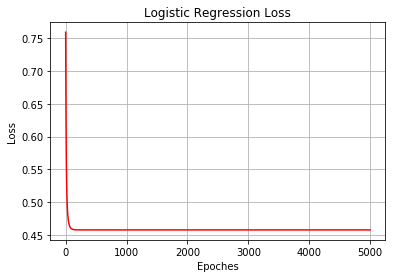

In [170]:
plt.figure(1)
plt.plot([i[0] for i in LOSS],[i[1] for i in LOSS],'r')
plt.title("Logistic Regression Loss")
plt.grid(True)
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.savefig("./graph/PartI/LR.png",dpi=1000)
plt.show()